<a href="https://colab.research.google.com/github/tiashamondal29/Global-Wheat-Detection-Faster-R-CNN-and-DETR/blob/main/Comparision_between_Faster-RCNN_and_DETR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Object Detection from Images using Faster R-CNN and DETR**

Submitted By : Tiasha Mondal (Reg No: 202259828)

 [Faster R-CNN Colab Link](https://colab.research.google.com/drive/1LF56TegesqFN38M_Ecz-2NTwLIU8cm8S#scrollTo=2DHs3xx1mTgk)


  [DETR Colab Link](https://colab.research.google.com/drive/1h2UPMOZHT1GO8Psq1GGR401DO59DMWk9)

# **1. Overview/Summary**
Wheat products are a common grain used in many food items, including breakfast toast or cereal. Due to the popularity of wheat as a food and crop, it has been extensively studied. Plant scientists use image detection of "wheat heads" to obtain large and precise data about wheat fields worldwide.</p>
The aim of this report is to evaluate the performance of two popular object detection models, Faster R-CNN and DETR, on the Global Wheat Detection dataset. The Global Wheat Detection dataset contains images of wheat fields, and the task is to detect individual wheat heads in the images. The report will compare the performance of both models based on various evaluation metrics to determine which model is better suited for the given task.</p>

# Aim
The aim of this report is to evaluate the performance of Faster R-CNN and DETR models on the Global Wheat Detection dataset and compare their performance with relevant metrics. The report will provide an in-depth analysis of the models' accuracy, precision, recall and mean average precision (mAP) on the dataset. This analysis will help in determining which model is better suited for the given task of detecting wheat heads in the images. The report will also highlight the strengths and weaknesses of each model and provide recommendations for future research in this area.</p>
# Main Findings

* **Model performance metrics:** To evaluate the performance of the models, mean average precision (mAP) at different intersection over union (IoU) thresholds, as well as the recall value, were recorded for both the R-CNN and DETR models. Based on these findings, the R-CNN model achieved a slightly higher mAP value than the DETR model, suggesting better overall performance in detecting wheat heads. Additionally, the recall value for the R-CNN model was higher than that of the DETR model, indicating that R-CNN was better at identifying all relevant instances of wheat heads. These metrics suggest that the R-CNN model may be a better choice for wheat head detection on the Global Wheat Detection dataset, although both models still exhibit relatively low mAP and recall values. Further investigation into factors such as model architecture and training data may help to improve performance.
* **Training and evaluation methodology:** The training and evaluation methodology used for the R-CNN and DETR models for wheat head detection involved preprocessing the data, applying data augmentation techniques, defining appropriate loss functions, and optimizing hyperparameters using a validation set. Cross-validation has been done ensure that the model is not overfitting or underfitting the data.


# **2. Methodology** 
To achieve this task, the following dataset has been used. 

Kaggle Dataset : https://www.kaggle.com/competitions/global-wheat-detection/data

Datset contains the following files.


*   train.csv - the training data

*   sample_submission.csv - a sample submission file in the correct format
*   train.zip - training images


*   test.zip - test images


train.csv contains the following columns.

*   image_id - the unique image ID

*   width, height - the width and height of the images
*   bbox - a bounding box, formatted as a Python-style list of [xmin, ymin, width, height]

Dataset has been imported from [Kaggle competition](https://www.kaggle.com/competitions/global-wheat-detection) directly as a part of this task.


```
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c global-wheat-detection
```
# Data Preprocessing
Different formats are used to annotate bounding boxes for object detection tasks, depending on the model. The most common formats are `coco`, `voc-pascal`, and `yolo`, which encode the coordinates in the following ways:

- `coco`: `[x, y, width, height]`, where `x` and `y` represent the upper-left coordinate of the rectangle.
- `voc-pascal`: `[x1, y1, x2, y2]`, where `x1` and `y1` represent the upper-left coordinate of the rectangle, and `x2` and `y2` represent the lower-right coordinate.
- `yolo`: `[x, y, width, height]`, where `x` and `y` represent the center of the rectangle.

In the present dataset, bounding box coordinates are given in the coco format.
To prepare the data for training, we load and reshape the table to match the expected format of the model.



```
image_id	width	height	bbox	                         source
0	b6ab77fd7	1024	1024	[834.0, 222.0, 56.0, 36.0]	usask_1
1	b6ab77fd7	1024	1024	[226.0, 548.0, 130.0, 58.0]	usask_1
2	b6ab77fd7	1024	1024	[377.0, 504.0, 74.0, 160.0]	usask_1
3	b6ab77fd7	1024	1024	[834.0, 95.0, 109.0, 107.0]	usask_1
4	b6ab77fd7	1024	1024	[26.0, 144.0, 124.0, 117.0]	usask_1
```

As we can see, the current dataset has **one bounding box per row** and x, y, width, and height of the bounding box are represented in the single column using list-style formatting.

To better work with the data, we have **splited the values of the bounding box into separate columns**.

The modified dataset looks like this:


```
image_id	width	height	source	    x	    y	    w	    h
0	b6ab77fd7	1024	1024	usask_1	834.0	222.0	56.0	 36.0
1	b6ab77fd7	1024	1024	usask_1	226.0	548.0	130.0	58.0
2	b6ab77fd7	1024	1024	usask_1	377.0	504.0	74.0	 160.0
3	b6ab77fd7	1024	1024	usask_1	834.0	95.0	 109.0	107.0
4	b6ab77fd7	1024	1024	usask_1	26.0	 144.0	124.0	117.0
```
Next step : Let's restructure the data to have **one image per row**, with the number of bounding boxes in each image. This will make it easier to work with the data and feed it into the model.


In [ ]:
grouped_df = group_bboxes(marking)
NUM_QUERIES = max(grouped_df['bbox_count']) # How many bboxes shall the model output per image.
grouped_df.head()

Here, the **group_bboxes(maring)** function is defined as follows:

In [ ]:
def group_bboxes(df):
    df_ = df.copy()
    df_['bbox_count'] = 1
    df_ = df_.groupby(['image_id', 'source']).count().reset_index()
    return_df = df_[['image_id', 'source', 'bbox_count']]
    return return_df

This function gives a clear idea on how many bounding boxes are there per image. 



```
     image_id	 source	   bbox_count
0	00333207f	arvalis_1	55
1	005b0d8bb	usask_1	  20
2	006a994f7	inrae_1	  25
3	00764ad5d	inrae_1	  41
4	00b5fefed	arvalis_3	25
```



# Data Visualization
Object detection involves identifying objects within an image or video, and data visualization can help us to better understand the characteristics of the objects in the data, such as their size, shape, and color. Visualisation is crucial to determine whether the images  are noisy or weird, preprocessing may be required before training a model.

I have taken the help of three aproaches for data visualization




*   **Exploratory Data Analysis (EDA)**
     
       Exploratory Data Analysis (EDA) is needed for object detection because it helps to understand the data that will be used to train the object detection model. EDA can be used to identify the different objects in the data, the relationships between the objects, and the distribution of the data. This information can be used to choose the right object detection model and to train the model more effectively.

    For example, EDA can be used to identify the different types of objects that are present in the data. This information can be used to choose the right object detection model. For example, if the data contains mostly cars, then a model that is designed to detect cars would be a good choice.


      
*   **Check Image Shape**

  Checking images shape and color would be helpful  for plot histograms .


*   **Plot histogram of pixel values**

  Plotting the histogram of pixel values for object detection is important because it can help to identify the different objects in an image. The histogram can show the distribution of pixel values in an image, which can be used to identify objects that have a specific range of pixel values and any outlier images (such as those with all zeros).

# Exploratory Data Analysis (EDA)



This code creates a figure with a size of 10x10 and displays a gallery of the 5 images from the train directory if RUN_EDA is True.

39a0e5556.jpg
b838eaf1d.jpg
83bfee8fd.jpg
daab3de13.jpg
20c6725f1.jpg
f91e92fd4.jpg


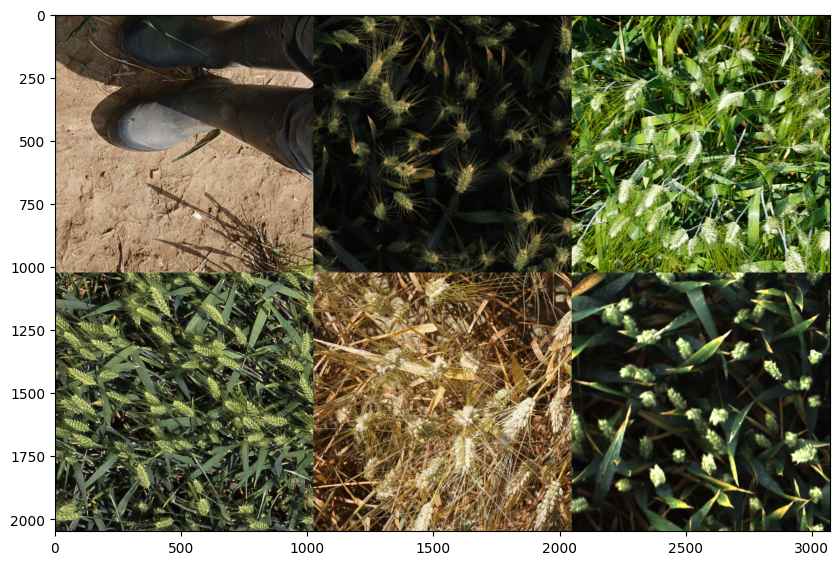

In [ ]:
if RUN_EDA:
    img_names = Path(DATA_DIR+'train/').glob('*.jpg')
    img_list = []
    for i, img_name in enumerate(img_names):
        img_list.append(load_img(img_name.as_posix()))
        print(img_name.name)
        if i == 5: 
            break
    plt.figure(figsize=(10,10))
    plt.imshow(create_gallery(np.array(img_list), ncols=3))
else:
    print('RUN_EDA is False')

## Check Image Shape



In [ ]:
if RUN_EDA:
    img_shape = set()
    img_ext = set()
    img_names = Path(DATA_DIR+'train/').glob('*')
    pbar = tqdm(img_names, total=len(grouped_df))
    for img_name in pbar:
        img = load_img(img_name.as_posix())
        img_shape.add(img.shape)
        img_ext.add(img_name.suffix)
    print(f'Image shapes are {img_shape}.')
    print(f'Image extensions are {img_ext}.')

  0%|          | 0/3373 [00:00<?, ?it/s]

Image shapes are {(1024, 1024, 3)}.
Image extensions are {'.jpg'}.


We are confident that all images are 1024 x 1024 RGB jpg.

## Plot histogram of pixel values


  0%|          | 0/147793 [00:00<?, ?it/s]

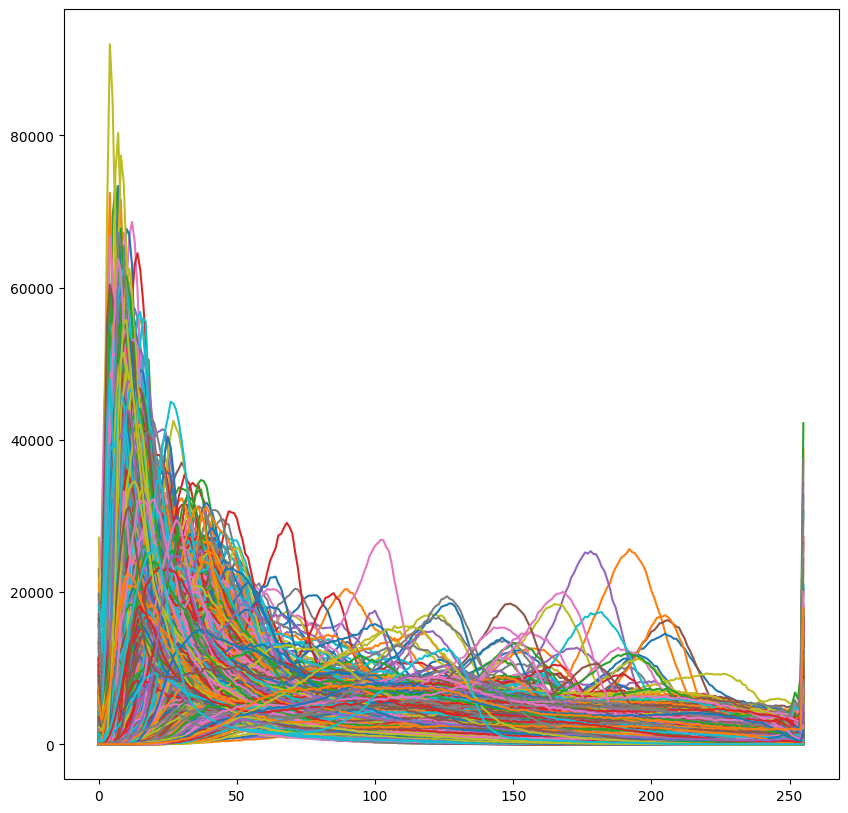

In [ ]:
if RUN_EDA:
    img_names = Path(DATA_DIR+'train/').glob('*')
    plt.figure(figsize=(10,10))
    pbar = tqdm(img_names, total=len(df))
    for img_name in pbar:
        img = load_img(img_name.as_posix())
        hist = cv2.calcHist([img],[0],None,[256],[0,256])
        plt.plot(hist)
    plt.show()
else:
    print('RUN_EDA is False')

The image signals in many images appear dark, while in some images they are saturated.

In this notebook, for sake of simplicity, we will proceed to the next section without any preprocessing.

**Defining Helper Functions** 

We have defined different helper functions in both of the notebooks and reused those functions at the top of the Notebooks. This can lead to cleaner, more organized, and more efficient code, which can be especially helpful for larger and more complex projects. Details have been discussed in the Notebook files. 

# Define Model Components

Before training a model using PyTorch, the following steps need to be completed:


*   Define Image Transformation and Augmentation

*   Define the Dataset


*   Define the DataLoader
*  Define the Model


## Define Image Transformation and Augmentation

Before creating the dataset, let's define the transformations and augmentations that will be applied to the images.

**For object detection tasks, the bounding boxes also need to undergo transformations and augmentations.**

To transform the bounding boxes,we can refer to the following:
- [GitHub/albumentations-team/albumentations#spatial-level-transforms](https://github.com/albumentations-team/albumentations#spatial-level-transforms)
- [Albumentations Documentation/Bounding boxes augmentation for object detection](https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/#bounding-boxes-augmentation)
    - How `min_area` and `min_visibility` work.

Two image transformation functions for training and validation data have been defied here.  The transform function for train data applies a series of augmentation techniques such as random resizing, changing hue, saturation, brightness, and contrast, flipping horizontally and vertically, and cutout. The validation tranform function only resizes the images to the same size as the training images. Both functions use the Albumentations library to apply the transformations and convert the images and bounding box coordinates to PyTorch tensors. In our code, we have created a function that returns a list of transforms to be applied to images and labels for training or validation. The transforms include flipping the image horizontally or vertically with a probality of 0.5 and converting the image to a Tensor.
Below is the provided code for transformation oerformed in the DETR Code for the reference.

```
# Image Transformation & Augmentation
def transform_train():
    transforms = [
        #A.RandomResizedCrop(512,512,p=1),
        A.Resize(512, 512, p=1),
        A.OneOf([
            A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit= 0.2, val_shift_limit=0.2, p=0.9),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.9)
        ], p=0.9),
        A.ToGray(p=0.01),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.Cutout(num_holes=8, max_h_size=64, max_w_size=64, fill_value=0, p=0.5),   
        ToTensorV2(p=1)
    ]
    bbox_params = A.BboxParams(format='coco', min_area=0, min_visibility=0, label_fields=['labels'])
    return A.Compose(transforms, bbox_params, p=1)


# Validation images undergo only resizing.
def transform_valid():
    transforms = [
        A.Resize(512,512,p=1),
        ToTensorV2(p=1)
    ]
    bbox_params = A.BboxParams(format='coco', min_area=0, min_visibility=0,label_fields=['labels'])
    return A.Compose(transforms, bbox_params, p=1)
```




## Define the Dataset
A custom PyTorch dataset class has been created for both the model. It loads the image and its corresponding annotations from the given directory and returns it in the required format. It also applies transformations to the image and updates the annotations accordingly.  It returns the image, target dictionary containing the boxes, labels, image ID, area, and iscrowd, and the image ID as a tuple. The class takes in the DataFrame, image directory, and phase (default is train) as inputs, and applies transforms if they are specified. The __len__ function returns the number of unique images, and the __getitem__ function loads the image and creates the target dictionary.

## Define the DataLoader
In this section we have defined PyTorch's DataLoader class to create data loaders for training and validation datasets.

train_data and val_data are assumed to be PyTorch Dataset objects containing the training and validation data respectively.

The DataLoader objects are created with the following arguments:

* **batch_size:** specifies the number of samples to be included in each batch.
* **shuffle:** determines whether the data loader should shuffle the data before each epoch.
* **num_workers:** specifies the number of worker processes to use for data loading.
* **collate_fn:** is a function that is called to collate the samples into batches. 


**For Faster R-CNN:**



```
Batch Size - 8
num_workers - 4
```

**For DETR**



```
Batch Size - 16
num_workers - 2
```


##Define the Model






*   **Define Model for Faster R-CNN**

      In this notebook, we will use a pre-trained Faster R-CNN Model. The benefits of using a pretrained model are that it saves time and resources required to train a model from scratch. The model has already been trained on a large dataset, which helps to learn features that are useful for the task. In this case, the Faster R-CNN model has been trained on the COCO dataset, which includes many object classes, making it a good starting point for detecting objects in other datasets. 

    But we need to modify these parameters num_classes to match **the number of classes and bounding boxes** in the target dataset.

    

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
num_classes = 2  # 1 class (wheat) + background

# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

*   **Define Model for DETR**

      In this notebook, we will use a pre-trained DETR model downloaded using `torch.hub.load()`.

    - Initial DETR model has 91 (+ 1 background) classes
    - Initial DETR model takes in 100 queries = outputs 100 bboxes for every image

    Thus, we need to modify these parameters (`NUM_CLASSES`, `NUM_QUERIES`) to match **the number of classes and bounding boxes** in the target dataset.

In [ ]:
class DETRModel(nn.Module):
    def __init__(self):
        super(DETRModel,self).__init__()
        self.num_classes = NUM_CLASSES
        self.num_queries = NUM_QUERIES
        
        # Donwload pre-trained model
        self.model = torch.hub.load('facebookresearch/detr', 'detr_resnet50', pretrained=True)
        self.in_features = self.model.class_embed.in_features
        
        self.model.class_embed = nn.Linear(in_features=self.in_features, out_features=self.num_classes)
        self.model.num_queries = self.num_queries
        
    def forward(self,imgs):
        return self.model(imgs)

# **3. Training and Validating**

To create an effective deep learning model, we need to determine the optimal architecture and hyperparameters. 

One approach for this is to use **cross-validation**, where data is divided into subsets to train and validate the model. Using MLOps tools like [**MLFlow**](https://mlflow.org/) can greatly assist in tracking the performance of the model.

**Once we identify the optimal combination of architecture and hyperparameters**, we can **train the model on all available data**.

It's debatable whether to retrain a single model or use an ensemble of models created during cross-validation. 

- [StackExchange - How to choose a predictive model after k-fold cross-validation?](https://stats.stackexchange.com/questions/52274/how-to-choose-a-predictive-model-after-k-fold-cross-validation)
- [StackOverflow - k-fold cross validation model selection method](https://stackoverflow.com/questions/46860325/k-fold-cross-validation-model-selection-method)

But **Cross-validation** can be computationally expensive and time-consuming because cross-validation involves training and testing the model on multiple folds of the data, it can be time-consuming, especially for complex models or large datasets. Therefore, we are just showing this for only DETR. Although we have showed train and validation loss for R-CNN 




**Training and Vaidating on R-CNN**





*   First,the model is moved to the specified device, such as GPU.
*   Next, an optimizer is defined to update the model weights during training. The optimizer is a **stochastic gradient descent (SGD)** with a **learning rate** of 0.005, **momentum** of 0.9 and weight decay of 0.0005.



```
model.to(device)
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
```



*  Then, the model is trained for 5 epochs, and for each epoch, the code loops through the training data loader, which contains images, their annotations, and their IDs. The images and annotations are transferred to the specified device, and the model is put in training mode.
*   For each batch of data, the model is used to predict the bounding boxes of objects in the images, and a loss is calculated based on the difference between the predicted boxes and the ground truth boxes. The optimizer is then used to update the model weights based on this loss.



*   Finally, The code then calculates the average training loss for the epoch and prints it. If the training loss is lower than the previous lowest training loss, the model is saved as the new best model. Finally, the code prints the time elapsed for the epoch.

All code to reproduce these steps have been attached below. 












In [ ]:
num_epochs = 5
train_loss_min = 0.9
total_train_loss = []

for epoch in range(num_epochs):
    print(f'Epoch :{epoch + 1}')
    start_time = time.time()
    train_loss = []
    model.train()
    for images, targets, image_ids in train_data_loader:
        
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)

        losses = sum(loss for loss in loss_dict.values())
        train_loss.append(losses.item())        
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
    #train_loss/len(train_data_loader.dataset)
    epoch_train_loss = np.mean(train_loss)
    total_train_loss.append(epoch_train_loss)
    print(f'Epoch train loss is {epoch_train_loss}')
    
#     if lr_scheduler is not None:
#         lr_scheduler.step()
    
    # create checkpoint variable and add important data
    checkpoint = {
            'epoch': epoch + 1,
            'train_loss_min': epoch_train_loss,
            'state_dict': model.state_dict(),
            'optimizer': optimizer.state_dict(),
        }
    
    # save checkpoint
    # save_ckp(checkpoint, False, checkpoint_path, best_model_path)
    ## TODO: save the model if validation loss has decreased
    if epoch_train_loss <= train_loss_min:
            print('Train loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(train_loss_min,epoch_train_loss))
            # save checkpoint as best model
            # save_ckp(checkpoint, True, checkpoint_path, best_model_path)
            train_loss_min = epoch_train_loss
    
    time_elapsed = time.time() - start_time
    print('{:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))


Once the training is done, the model is saved in order to use it for testing and evaluation.



```
torch.save(model.state_dict(), 'fasterrcnn_resnet50_fpn.pth')
```



**Training and Vaidating on DETR**


This code performs cross-validation for object detection using the DETR model. The purpose of cross-validation is to assess the performance of the model and prevent overfitting by splitting the dataset into multiple folds, training on one fold and validating on the others.


This code performs training and validation of the DETR model for object detection on a dataset with k-fold cross-validation, where k is specified by the **FOLD_NUM** constant defined in the **Set Config** section of our code

For each fold, the code creates training and validation dataloaders, loads the DETR model, defines a criterion (loss function), and an optimizer. The code then performs training for the specified number of epochs defined by the **EPOCHS** constant and calculates the average training and validation losses for each epoch.


```
FOLD_NUM = 3 # For cross-validation
EPOCHS = 5 #Number of epochs
```


To make the training process a little different  than the Faster R-CNN, we have used **Adam Optimizer**.


```
Learning Rate : 0.00002 or 2e-5
```


The train_loss_list and valid_loss_list variables are used to store the training and validation losses for each fold. At the end of the training process for all folds, the **show_validation_score()** function is called to visualize the training and validation loss curves(Fig attached below in the Results and Discussion Section).

This code is useful for evaluating the performance of the DETR model for object detection tasks and can be modified and adapted for other deep learning models and tasks.

Next, we have again trained the model **on all train data** 

In [ ]:
if RUN_TRAINING and (TRAIN_ALL == False):
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
    print(f'Using {device} device')

    # Cross-validation
    folds = KFold(n_splits=FOLD_NUM, shuffle=True, random_state=SEED)\
            .split(np.arange(grouped_df.shape[0]), grouped_df['image_id'].to_numpy())
    
    # For Visualization
    train_loss_list = []
    valid_loss_list = []

    for fold, (trn_idx, val_idx) in enumerate(folds):     
        print(f'==========Cross-Validation Fold {fold+1}==========')   
        # Define matcher, weight, and loss. 
        # See https://github.com/facebookresearch/detr/blob/3af9fa878e73b6894ce3596450a8d9b89d918ca9/models/detr.py#L304
        matcher = HungarianMatcher()
        weight_dict = weight_dict = {'loss_ce': 1, 'loss_bbox': 1 , 'loss_giou': 1}
        losses = ['labels', 'boxes', 'cardinality']

        # Load Data
        train_loader, valid_loader = create_dataloader(grouped_df, marking, trn_idx, val_idx)

        # Load model, loss function, and optimizing algorithm
        model = DETRModel().to(device)
        criterion = SetCriterion(NUM_CLASSES-1, matcher, weight_dict, eos_coef = NULL_CLASS_COEF, losses=losses).to(device) # eos_coef is used in the output layer to affect the output corresponding to the absence of an object.
        optimizer = optim.Adam(model.parameters(), lr=LR)
                
        # For Visualization
        train_losses = []
        valid_losses = []

        # Start training
        best_loss = 10**5
        for epoch in range(EPOCHS):
            time_start = time.time()
            print(f'==========Epoch {epoch+1} Start Training==========')
            model.train()
            # criterion.train()
            train_loss = AverageMeter()
            pbar = tqdm(enumerate(train_loader), total=len(train_loader))
            for step, (imgs, targets, image_ids) in pbar:
                # print('.', end='') # Sometimes progress bars do not emerge on the notebook. In in the case, remove hash
                img_list = list(img.to(device) for img in imgs)
                targets = [{k: v.to(device) for k, v in target.items()} for target in targets]
                
                output = model(img_list)
                
                loss_dict = criterion(output, targets)
                weight_dict = criterion.weight_dict

                losses = sum(loss_dict[k] * weight_dict[k] for k in loss_dict.keys() if k in weight_dict)

                optimizer.zero_grad()
                losses.backward()
                optimizer.step()

                train_loss.update(losses.item(), BATCH_SIZE)         

            print(f'==========Epoch {epoch+1} Start Validation==========')
            
            with torch.no_grad():
                valid_loss = AverageMeter() 
                preds = []
                pbar = tqdm(enumerate(valid_loader), total=len(valid_loader))
                for step, (imgs, targets, image_ids) in pbar:
                    img_list = list(img.to(device) for img in imgs)
                    targets = [{k: v.to(device) for k, v in target.items()} for target in targets]

                    output = model(img_list)

                    loss_dict = criterion(output, targets)
                    weight_dict = criterion.weight_dict

                    val_losses = sum(loss_dict[k] * weight_dict[k] for k in loss_dict.keys() if k in weight_dict)
                    valid_loss.update(val_losses.item(), BATCH_SIZE)

            # print results from this epoch
            exec_t = int((time.time() - time_start)/60)
            print(
                f'Epoch : {epoch+1} - loss : {train_loss.avg:.4f} - val_loss : {valid_loss.avg:.4f} / Exec time {exec_t} min\n'
            )

            # For visualization
            train_losses.append(train_loss.avg)
            valid_losses.append(valid_loss.avg)
        
        train_loss_list.append(train_losses)
        valid_loss_list.append(valid_losses)
        del model, optimizer, train_loader, valid_loader, train_losses, valid_losses
        gc.collect()
        torch.cuda.empty_cache()
    
    show_validation_score(train_loss_list, valid_loss_list)



**Train on All Data**

After finding **the best number of epochs and hyperparameters** through cross-validation, the final step is **to train the model using all available data** using the same training process as mentioned above. 

To simplify the process and avoid errors, **combining the code for cross-validation and training on all data into a single script can be helpful** ([ref](https://www.kaggle.com/code/shnakazawa/semantic-segmentation-with-pytorch-and-u-net)). This approach streamlines the workflow and makes it easier to transition from cross-validation to training with all data.


Creating a final model using the parameters obtained from cross-validation could increase our confidence that the deep learning model is optimized for the specific task at hand. 



# **4. Results and Discussion**


# Train Loss and Validation Loss





**Train Loss and Validatiion Loss for Faster R-CNN**

The decreasing trend of both training and validation loss after 5 epochs indicates that the model is learning and improving with each epoch. This suggests that the training process is effective, and the model is becoming more accurate in its predictions. However, it is important to monitor these trends over a longer period to ensure that the model continues to improve and does not overfit to the training data. As of now due to the limitage of GPU, we have monitored it for only 5 epochs.

![](https://drive.google.com/uc?export=view&id=1mrQc1EEOvOWH-IOkb8BoW2kXAEaXOZ8H)




**Train Loss and Validatiion Loss for DETR**

Train and validation loss in each fold of DETR after training 5 epochs has been shown below. With each epoch, the decreasing trend of both losses indicates that the model is learning to capture the patterns and trends in the training data and is also able to generalize well to new, unseen data. 

![](https://drive.google.com/uc?export=view&id=1DaUxUtdSecYLYo5rMmFUrXyaow4Ecmty)


# Prediction on Test Images 

**Prediction by R-CNN model**

We have tested our model on one of the image from the Test directory. Seems like its it prediting the bounding boxes pretty accurate. 



**Prediction by DETR model**

The DETR model has also demonstrated reliable performance in terms of predicting bounding boxes, indicating its proficiency in object detection. 


Left image **Prediction by R-CNN model on Test Image** and 
Right image **Prediction by DETR model on Test Image**
![](https://drive.google.com/uc?export=view&id=1882sKeUVQAKbUMNk6-UdUcCYBR8cw4nS)




# Evaluation Matrics - mAP
The evaluation metric utilized in this study is the mean average precision (mAP) measured at various intersection over union (IoU) thresholds for both models. To conduct the evaluation, a total of 34 unique image_ids were randomly selected from the training set and used to perform training using a pre-trained model. Following training, the predicted bounding boxes were compared to the actual bounding boxes, and the evaluation was based on this comparison. The IOU was determined as a threshold to ascertain whether the predicted object overlapped with the ground truth object enough to be considered a true positive. This IOU value was then utilized to calculate the mAP. 

**The function for calculating IOU is defined below **
The function called IoU takes two bounding box of actual and predicted coordinates as input, and returns the Intersection over Union (IoU) value of the two bounding boxes. The function first calculates the area of both bounding boxes and the area of their intersection. If the intersection area is 0 or negative, then the IoU value is set to 0. Otherwise, the IoU value is calculated by dividing the intersection area by the sum of the actual and predicted bounding box areas minus the intersection area.

```
#Defining the IoU Function for calculating mAP
def IoU(actual_implant, predicted_implant):
  
  actual_implant_area = (actual_implant[2] - actual_implant[0] + 1) * (actual_implant[3] - actual_implant[1] + 1)
  predicted_implant_area = (predicted_implant[2] - predicted_implant[0] + 1) * (predicted_implant[3] - predicted_implant[1] + 1)

  # coordinates of the intersection rectangle
  inter_rect = (max(actual_implant[0], predicted_implant[0]),
                max(actual_implant[1], predicted_implant[1]),
                min(actual_implant[2], predicted_implant[2]),
                min(actual_implant[3], predicted_implant[3])
                )
  
  if (inter_rect[0] >  inter_rect[2] or inter_rect[1] >  inter_rect[3]):
    # No intersection is found, IoU = 0 
    return 0

  inter_rect_area = (inter_rect[2] - inter_rect[0] + 1) * (inter_rect[3] - inter_rect[1] + 1)

  iou = inter_rect_area/float(actual_implant_area + predicted_implant_area - inter_rect_area)

  return float("{:.3f}".format(iou))



```





*  In the notebook, the **threshold value** as been selected as 0.5 for both models. The **threshold** is a float value that is used as a reference value to determine whether a predicted bounding box matches the actual bounding box. If the Intersection Over Union (IOU) of a predicted bounding box and the actual bounding box is greater than or equal to the threshold value, then it is considered a true positive (TP), otherwise, it is considered a false positive (FP). Additionally, if the IOU is equal to zero, it is considered a false negative (FN). 


    ```
    # Make predictions on the validation data
    start_time = time.time()
    detection_threshold = 0.5
    ```
Any predicted bounding box with a score below the detection_threshold is filtered out, and only the bounding boxes with scores greater than or equal to the detection_threshold are used for further evaluation.

* 
The **thresholds_list** is a list of empty lists, with each inner list representing the results for a particular threshold value. The purpose of this list is to keep track of the results for each threshold value used. During the evaluation, each detected bounding box is compared with the actual bounding box, and the result (TP, FP, or FN) is appended to the corresponding thresholds_list based on the value of iou and the current threshold value. The thresholds_list is a 2D list, with each inner list representing the results for a particular threshold value, and the outer list holding all the inner lists for each threshold value.


*   For both the models, the **thresholds** is an array that contains 21 values ranging from 0 to 1 with a step size of 0.05. 



      ```
      print(len(thresholds_list))
      print(len(thresholds))

      21
      21
      ```
* Once the IOU value and all the prediction boxes are calculated, we have filtered out the predictiom boxes only with the highest Confidence Score and the resulting Dataset looks like this(displayed only 1st 5 rows). 


![](https://drive.google.com/uc?export=view&id=1nvtKfsKWyokgJvI0GJrkbMkaG8aWL7Vl)

As per the resulting table:

* **image_id** - Uniiue image id of the images
* **width, height** - height and width of the image
* **bbox** - Actual Bounding boxes
* **prediction** - The predicted bounding boxes with highest Confidence Score 
* **IOU** - Calculated IOU values from the function defined above 
* **accuracy** - Confidence Score of the predicted bounding boxes (splitetd from the prediction column
* **x_pred, y_pred, w_pred, h_pred** - Splitted from Prediction column in coco format
* **x, y, w, h** - Splitted from the bbox in coco format

**IOU value for R-CNN**

The largest value of IOU for R-CNN is 0.92 which is a pretty good score.

**IOU value for DETR**
The largest value of IOU for R-CNN is 0.72 which is a bit lower than the Faster R-CNN


High Intersection over Union (IoU) score is generally considered good, as it indicates a high degree of overlap between the predicted and ground truth bounding boxes.

We have performed an analysis of IOU over 0.80 for Faster R-CNN and over 0.7 for DETR  models(since, the highest sIOU for DETR is 0.72) and tried to check the accuracy of the models. Below the plotted images are attached. 




Left image **IOU > 0.80 FOR R-CNN** and 
Right image describes **IOU > 0.70 FOR DETR**       
![](https://drive.google.com/uc?export=view&id=1ZTWZHpVkmagUOOJy54fqy7rkOt_9ccKL)


# Confusion Matrix

A confusion matrix is an useful tool in evaluating the performance of a machine learning model for a classification problem. It is a table that shows the number of true positive, true negative, false positive, and false negative predictions made by the model on a set of test data. The rows of the matrix represent the actual class labels, while the columns represent the predicted class labels.

In this notebook, we have calculated the number of true positive (TP), false positive (FP), false negative (FN), and true negative (TN) detections for object detection using a specific detection threshold of 0.50 and 0.85 for both the models.  





*   **Confusion Matrix for Faster R-CNN**



![](https://drive.google.com/uc?export=view&id=1IkZ2Ao1ZZ46NZrmlLeSlw3lex19vASGp)




*  **Confusion Matrix for DETR**

![](https://drive.google.com/uc?export=view&id=18CQoOrkXfqk0q4qL-PGND8hUPwF2hlAV)



# Precison-Recall Curve
left image describes **Precison-Recall Curve Faster R-CNN** and 
right image describes **Precison-Recall Curve DETR**                  


![](https://drive.google.com/uc?export=view&id=1maUDqxzNHzYWZNTPerN1tf1W3RPZpQlF)




# Calculating mAP

Finally the mAP has been calculated for both the model. 


A higher mAP (mean average precision) is generally better because it indicates that the model is making more accurate predictions and is better at ranking the predicted results in order of their likelihood of being correct. In other words, a higher mAP means that the model is achieving higher precision-recall trade-off, which is an important measure of a model's performance in object detection tasks.

As per the data from the below table, we can conclude that Faster R-CNN has a higher Mean Average Precision (mAP) than DETR. Therefore, we can say that Faster R-CNN is performing better than R-CNN for this particular task.


# Comparison  Table 




![](https://drive.google.com/uc?export=view&id=1igwyhPZZPawbIv1LscSRUI9ZEwqokBMe)




# **5. Summary and Recommendation**

It seems that the both object detection model works fairly well. Based on the evaluation of mAP , it seems that Faster R-CNN outperforms DETR on the global wheat dataset Detection. However, this conclusion should be taken with caution as it is based on a single evaluation metric and other factors such as model complexity, training time, and inference speed should also be considered.

As for future research, there are several directions that can be pursued. One potential area is to investigate the impact of different hyperparameters on the performance of both models, such as learning rate, batch size, and the number of training epochs. Additionally, exploring the use of transfer learning or fine-tuning techniques may also improve the performance of both models.

Furthermore, since both models rely on object detection, it may be interesting to compare their performance on other object detection datasets or tasks. For example, it may be beneficial to evaluate their performance on datasets with varying object sizes or densities to gain insights into their respective strengths and weaknesses.

In terms of recommendation, it is suggested to consider the specific requirements and constraints of the application when choosing between Faster R-CNN and DETR. While Faster R-CNN may offer higher mAP on IOU, it may be computationally expensive and time-consuming to train and deploy, making Faster R-CNN a more practical choice in some cases.

However, both the model have their own Pros and Cons such that:

# *Faster R-CNN*

**Pros:**

* **High accuracy:** Based on the training we have done, Faster R-CNN gave a better results . It is known for its high accuracy in object detection tasks, especially in scenarios with smaller objects and higher object density.


* **Established architecture:** Faster R-CNN has been around for several years and is a well-established architecture, with many pre-trained models and resources available for implementation and fine-tuning.


* **Two-stage approach**: The two-stage approach of Faster R-CNN allows for a more refined localization of objects, which can lead to more accurate results.


**Cons:**
* **Computationally intensive:** The two-stage approach of Faster R-CNN can be computationally expensive, especially during the proposal generation phase, which can limit its scalability.
* **Slow inference:** The multi-stage nature of Faster R-CNN can make inference times slower than other object detection models.
* **Difficult to fine-tune:** Fine-tuning Faster R-CNN can be challenging due to its complex architecture and the many hyperparameters that need to be tuned which we could not perform well in this notebook. This is something will be kept for further research and experiment.



# *DETR*

**Pros:**

* **End-to-end architecture:** DETR is an end-to-end object detection model that can perform object detection in a single stage, without requiring any post-processing steps. This can simplify the object detection pipeline and improve overall performance.

**Cons:**
* **Lower accuracy: ** Although DETR has shown promising results nearly same to the Faster R-CNN, it may not be as accurate as some of the other state-of-the-art object detection models, especially on small objects or dense scenes.
* **Slower training:** The training process for DETR can be slower compared to Faster R-CNN Model due to the complexity of its architecture and the large number of parameters. In our case, It took around one and half hour to train and evaluate our datasets on Faster R-CNN in a high computational GPU whereas for DETR it took around three hours. 
* **Not well-established:** DETR is a relatively new model, and there is less support and resources available compared to more established models like Faster R-CNN.



There are various techniques that can be employed to further enhance its performance, such as:

- **Incorporating a wider range of data augmentation techniques**
- **Implementing a more complex model architecture**

- **Performing Cross-validation on Faster-RCNN**
- **Performing thorough hyperparameter tuning**
- **Using ensembling methods**
- and more.

It is important to bear in mind that the effectiveness of these techniques is highly dependent on the specifics of the object detection task at hand, including the available data. A combination of multiple techniques may be necessary to achieve the desired level of performance.






# References

1. [Original paper of DETR](https://arxiv.org/abs/2005.12872) 
2. [Original paper of Faster R-CNN](https://arxiv.org/abs/1506.01497 )
3.[Sample Kaggle code](https://www.kaggle.com/code/lihuashun/detr-innovation-lab)
4. [PyTorch](https://pytorch.org/)
	- [PyTorch - SAVING AND LOADING MODELS](https://pytorch.org/tutorials/beginner/saving_loading_models.html)
5. [PyTorch Hub](https://pytorch.org/hub/)
6. [Original Dataset](https://www.kaggle.com/competitions/global-wheat-detection)

    - [PyTorch/Docs/torch.hub](https://pytorch.org/docs/stable/hub.html)
7. [Albumentations](https://albumentations.ai/)
8. [GitHub/facebookresearch/detr](https://github.com/facebookresearch/detr)
9. [End to End Object Detection with Transformers:DETR](https://www.kaggle.com/code/tanulsingh077/end-to-end-object-detection-with-transformers-detr#Wheat-Detection-Competition-With-DETR)
10. [GitHub/albumentations-team/albumentations#spatial-level-transforms](https://github.com/albumentations-team/albumentations#spatial-level-transforms)
11. [Albumentations Documentation/Bounding boxes augmentation for object detection](https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/#bounding-boxes-augmentation)
